<a href="https://colab.research.google.com/github/ohumkar/Time-Series/blob/master/Airline_Passenger_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series with LSTM

In [0]:
#Download dataset

!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

--2020-04-24 19:28:10--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519 [text/plain]
Saving to: ‘shampoo.csv’

shampoo.csv         100%[===================>]     519  --.-KB/s    in 0s      

2020-04-24 19:28:10 (27.2 MB/s) - ‘shampoo.csv’ saved [519/519]



In [0]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2020-04-24 19:28:13--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2020-04-24 19:28:13 (32.0 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [0]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch 
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [0]:
training_set = pd.read_csv('airline-passengers.csv')
#training_set = pd.read_csv('shampoo.csv')
print(training_set.head())
training_set = training_set.iloc[:,1:2].values

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


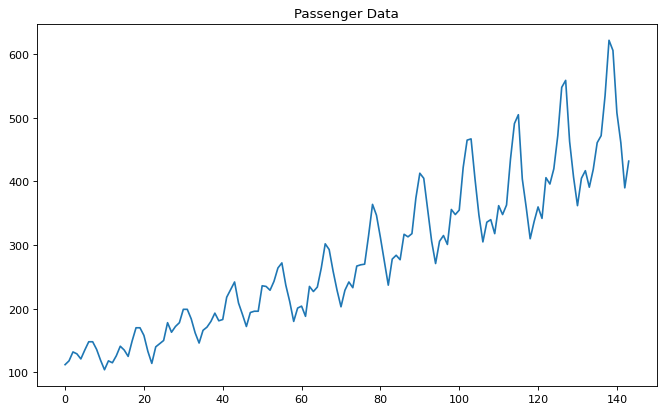

In [0]:
from matplotlib.pyplot import figure 
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(training_set, label = 'Passengers Data')
plt.title('Passenger Data')
plt.show()

In [0]:
#Data Laoding

def sliding_window(data, seq_length) :
  x = []
  y = []

  for i in range(len(data) - seq_length - 1) :
    _x = data[i:(i + seq_length)]
    _y = data[i + seq_length]
    x.append(_x)
    y.append(_y)
  
  return np.array(x), np.array(y)

In [0]:
#Data Scaler

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

In [0]:
#Setting Window

seq_length = 4
x, y = sliding_window(training_data, seq_length)

In [0]:
train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

In [0]:
dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [0]:
#Model

class LSTM(nn.Module) :
  def __init__(self, num_classes, input_size, hidden_size, num_layers) :
    super(LSTM, self).__init__()

    self.num_classes = num_classes
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.seq_length = seq_length

    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, num_classes)

  def forward(self, x) :
    h_0 = Variable(torch.zeros(
        self.num_layers, x.size(0), self.hidden_size))
    c_0 = Variable(torch.zeros(
        self.num_layers, x.size(0), self.hidden_size))
    
    ula, (h_out, _) = self.lstm(x, (h_0, c_0))
    h_out = h_out.view(-1, self.hidden_size)
    out = self.fc(h_out)

    return out

In [0]:
#Initializing model

num_epochs = 2000
learning_rate = 0.001

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr = learning_rate)

In [0]:
#Training

losses = []
for epoch in range(num_epochs) :
  outputs = lstm(trainX)
  optimizer.zero_grad()

  loss = criterion(outputs, trainY)
  losses.append(loss)

  loss.backward()

  optimizer.step()
  if epoch % 100 == 0 :
    print('Epoch: [ {} / {} ], Loss: {:.4f}'.format(epoch, num_epochs, loss.item()))

Epoch: [ 0 / 2000 ], Loss: 0.4501
Epoch: [ 100 / 2000 ], Loss: 0.2135
Epoch: [ 200 / 2000 ], Loss: 0.0908
Epoch: [ 300 / 2000 ], Loss: 0.0162
Epoch: [ 400 / 2000 ], Loss: 0.0132
Epoch: [ 500 / 2000 ], Loss: 0.0109
Epoch: [ 600 / 2000 ], Loss: 0.0086
Epoch: [ 700 / 2000 ], Loss: 0.0064
Epoch: [ 800 / 2000 ], Loss: 0.0050
Epoch: [ 900 / 2000 ], Loss: 0.0043
Epoch: [ 1000 / 2000 ], Loss: 0.0041
Epoch: [ 1100 / 2000 ], Loss: 0.0041
Epoch: [ 1200 / 2000 ], Loss: 0.0040
Epoch: [ 1300 / 2000 ], Loss: 0.0039
Epoch: [ 1400 / 2000 ], Loss: 0.0039
Epoch: [ 1500 / 2000 ], Loss: 0.0038
Epoch: [ 1600 / 2000 ], Loss: 0.0037
Epoch: [ 1700 / 2000 ], Loss: 0.0036
Epoch: [ 1800 / 2000 ], Loss: 0.0035
Epoch: [ 1900 / 2000 ], Loss: 0.0034


<function matplotlib.pyplot.show>

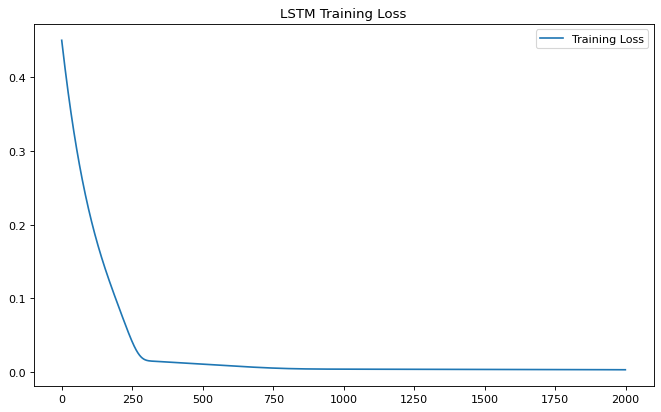

In [0]:
from matplotlib.pyplot import figure 
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(losses, label = 'Training Loss')
plt.title('LSTM Training Loss')
plt.legend()
plt.show

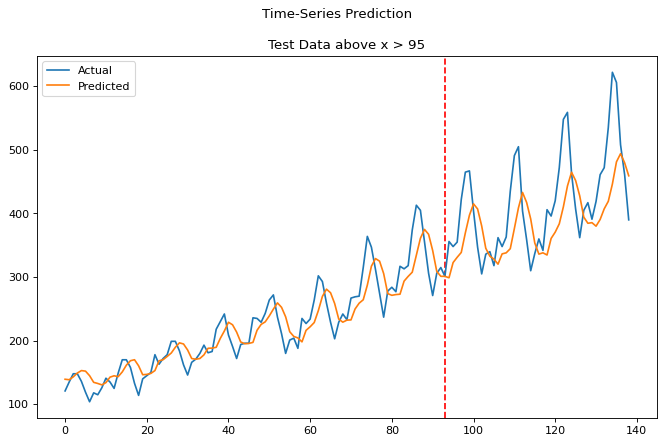

In [0]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, label = 'Actual')
plt.plot(data_predict, label = 'Predicted')
plt.legend()
plt.suptitle('Time-Series Prediction')
plt.title('Test Data above x > 95')
plt.show()